<a href="https://colab.research.google.com/github/bhavikaradadiya/Diabetes-Prediction-Using-Machine-Learning/blob/main/diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Dataset Introduction**

In [ ]:
# Let's first load and inspect the dataset to identify its structure, data types, and check if any cleaning or encoding is required.
import pandas as pd

# Load the dataset
df = pd.read_csv("/content/diabetes.csv")

# Display basic info and first few rows of the dataset
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


(None,
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 0            6      148             72             35        0  33.6   
 1            1       85             66             29        0  26.6   
 2            8      183             64              0        0  23.3   
 3            1       89             66             23       94  28.1   
 4            0      137             40             35      168  43.1   
 
    DiabetesPedigreeFunction  Age  Outcome  
 0                     0.627   50        1  
 1                     0.351   31        0  
 2                     0.672   32        1  
 3                     0.167   21        0  
 4                     2.288   33        1  )

## **Exploratory Data Analysis (EDA)**

In [ ]:
# Check for zero values in the columns where zero may indicate missing data
zero_value_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Count zero values in the specified columns
zero_values_count = df[zero_value_columns].eq(0).sum()

zero_values_count


,0
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11


<Figure size 600x400 with 0 Axes>

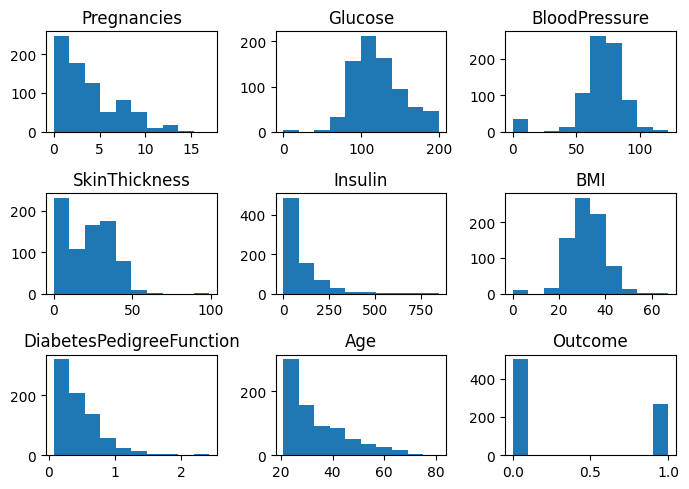

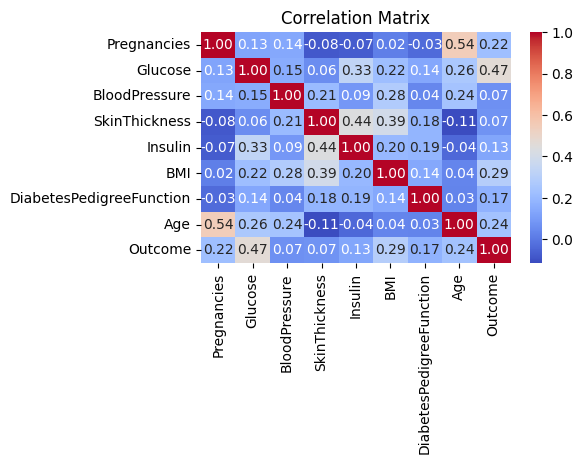

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure size
plt.figure(figsize=(6, 4))

# Plot histograms for continuous variables
df.hist(bins=10, figsize=(7,5), grid=False)
plt.tight_layout()
plt.show()

# Calculate and plot the correlation matrix
plt.figure(figsize=(5, 3))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


## **Implementation of Logistic Regression Model**

In [ ]:
# implementation of train the logistic regression model
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
data = pd.read_csv("/content/diabetes.csv")
# Split data into features (X) and target (y)
X = data.drop('Outcome', axis=1)
y = data['Outcome']
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)
# Make predictions on the test set
y_pred = model.predict(X_test)
# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy score is: {accuracy:.2f}")
print(f"precision score is: {precision:.2f}")
print(f"recall score is: {recall:.2f}")
print(f"f1 score: {f1:.2f}")

Accuracy score is: 0.73
precision score is: 0.62
recall score is: 0.65
f1 score: 0.63


## **Implementation of Support Vector Machine (SVM) Model**

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
data = pd.read_csv("/content/diabetes.csv")
X = data.drop('Outcome', axis=1)
y = data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision_score = precision_score(y_test, y_pred)
recall_score = recall_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)
print(f"Accuracy score is: {accuracy:.2f}")
print(f"precision score is: {precision_score:.2f}")
print(f"f1_score: {f1_score:.2f}")
print(f"recall_score:  {recall_score:.2f}")

Accuracy score is: 0.77
precision score is: 0.72
f1_score: 0.63
recall_score:  0.56


## **Model Accuracy Comparision**

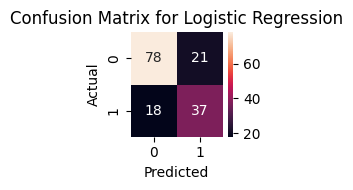

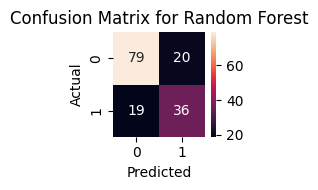

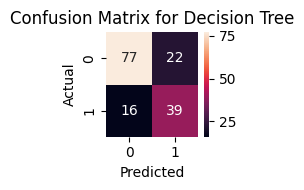

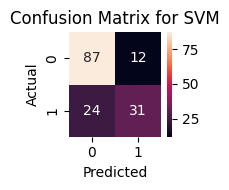

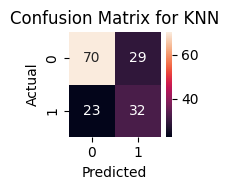

                 Model  Accuracy
0  Logistic Regression  0.746753
1        Random Forest  0.746753
2        Decision Tree  0.753247
3                  SVM  0.766234
4                  KNN  0.662338


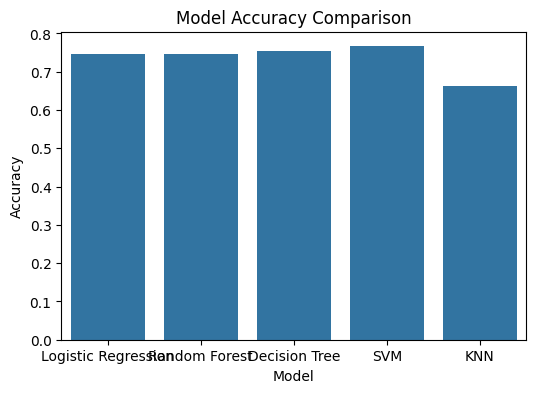

Best Model: SVM with Accuracy: 0.7662337662337663


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
data = pd.read_csv('/content/diabetes.csv')
X = data.drop('Outcome', axis=1)
y = data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter= 5000),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier()
}
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Classification metrics
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    # Store results
    results[name] = {
        "Accuracy": accuracy,
        "Confusion Matrix": cm,
        "Classification Report": report
    }
    # Optionally, plot the confusion matrix
    plt.figure(figsize=(2, 2))
    sns.heatmap(cm, annot=True, fmt='d')
    plt.title(f'Confusion Matrix for {name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
# Compare results
comparison_df = pd.DataFrame({
    "Model": results.keys(),
    "Accuracy": [result['Accuracy'] for result in results.values()]
})
print(comparison_df)
# Visualize comparison of model performance
plt.figure(figsize=(6, 4))
sns.barplot(x="Model", y="Accuracy", data=comparison_df)
plt.title("Model Accuracy Comparison")
plt.show()
# Recommendation based on the best performing model
best_model = comparison_df.loc[comparison_df['Accuracy'].idxmax()]
print(f"Best Model: {best_model['Model']} with Accuracy: {best_model['Accuracy']}")
